In [1]:
import pandas as pd
import json
import numpy as np
from pandasql import sqldf
import statistics 
import math
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime
from datetime import  date, datetime, timedelta


In [2]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [3]:
import dask.dataframe as dd 

In [4]:
# importing dowloaded csv with dask
filepath = '/Users/kaylalocklear/Documents/tableau/chal 3/Crimes_-_2001_to_Present.csv'
dsk_df = dd.read_csv(filepath, low_memory = False, dtype={'District': 'float64','Community Area': 'float64',
       'IUCR': 'object',
       'Ward': 'float64'}) 
dsk_df = dsk_df.compute()  #converts the data frame to a Pandas data 

In [5]:
dsk_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273884,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
273885,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
273886,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
273887,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [6]:
# look at all column names 
dsk_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [7]:
# filtering out subset of crimes after 2018
df2 = dsk_df[(dsk_df.Year > 2018)]
df2

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
90,12014684,JD189901,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,45.0,15.0,06,1141659.0,1925649.0,2020,03/25/2020 03:45:43 PM,41.952052,-87.754660,"(41.952051946, -87.754660372)"
183,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,3.0,33.0,11,1177560.0,1889548.0,2019,10/20/2019 03:56:02 PM,41.852248,-87.623786,"(41.852248185, -87.623786256)"
235,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,...,26.0,24.0,06,1160005.0,1905256.0,2019,10/20/2019 04:03:03 PM,41.895732,-87.687784,"(41.895732399, -87.687784384)"
265,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,True,...,15.0,58.0,08B,1158067.0,1876425.0,2021,09/12/2022 04:45:45 PM,41.816657,-87.695689,"(41.81665685, -87.695688608)"
421,12012127,JD189186,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,...,28.0,26.0,07,1150196.0,1898398.0,2020,03/25/2020 03:47:29 PM,41.877110,-87.723990,"(41.877110187, -87.723989719)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273884,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
273885,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
273886,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
273887,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [8]:
# checking for duplicates 
df2.duplicated().sum()

0

In [9]:
# checking dates dont go below 2019
df2.sort_values("Year")

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
680,11933421,JC561352,12/26/2019 09:44:00 PM,115XX S PEORIA ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,34.0,53.0,08B,1172159.0,1828132.0,2019,01/02/2020 03:56:21 PM,41.683836,-87.645412,"(41.683836017, -87.645412176)"
168917,11812128,JC413235,08/29/2019 01:20:00 PM,012XX N LARRABEE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,...,27.0,8.0,06,1172111.0,1908362.0,2019,09/05/2019 04:01:50 PM,41.903997,-87.643230,"(41.903996883, -87.643230238)"
168918,11811150,JC412159,08/29/2019 02:00:00 PM,079XX S GREENWOOD AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,8.0,44.0,05,1184931.0,1852548.0,2019,09/05/2019 04:01:50 PM,41.750547,-87.597895,"(41.750547026, -87.597894925)"
168919,11811381,JC412992,08/29/2019 08:00:00 PM,090XX S DAMEN AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,...,19.0,72.0,05,1164484.0,1844817.0,2019,09/05/2019 04:01:50 PM,41.729787,-87.673040,"(41.729787174, -87.673039626)"
168920,11811162,JC412673,08/29/2019 09:00:00 PM,041XX W 47TH ST,0460,BATTERY,SIMPLE,STREET,False,True,...,14.0,57.0,08B,1149568.0,1873147.0,2019,09/05/2019 04:01:50 PM,41.807830,-87.726950,"(41.807830379, -87.726950166)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246353,12958999,JG123878,01/21/2023 02:08:00 AM,031XX W 64TH ST,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,SIDEWALK,True,True,...,17.0,66.0,04B,1156361.0,1862019.0,2023,02/03/2023 03:49:04 PM,41.777159,-87.702335,"(41.777159354, -87.702334576)"
246354,12962133,JG127640,01/21/2023 01:00:00 AM,015XX S WABASH AVE,0460,BATTERY,SIMPLE,BAR OR TAVERN,False,False,...,3.0,33.0,08B,1177014.0,1892855.0,2023,01/28/2023 03:51:12 PM,41.861335,-87.625690,"(41.861335178, -87.625690175)"
246355,12960208,JG125390,01/21/2023 07:00:00 AM,004XX E 65TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,20.0,42.0,07,1180453.0,1862016.0,2023,01/28/2023 03:51:12 PM,41.776632,-87.614014,"(41.776632076, -87.614014118)"
246346,12960051,JG125217,01/21/2023 05:00:00 AM,003XX N LA SALLE DR,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,8.0,06,1175074.0,1902840.0,2023,01/28/2023 03:51:12 PM,41.888778,-87.632512,"(41.888778301, -87.632512191)"


In [10]:
# importing another csv with community names 
community = pd.read_csv('/Users/kaylalocklear/Documents/tableau/chal 3/CommAreas_202302221912.csv')
community

,AREA_NUMBE,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD
...,...,...
72,74,MOUNT GREENWOOD
73,75,MORGAN PARK
74,76,OHARE
75,77,EDGEWATER


In [11]:
# renaming area number to community area column
community.rename(columns={'AREA_NUMBE':'Community Area'},inplace = True)
community

,Community Area,COMMUNITY
0,35,DOUGLAS
1,36,OAKLAND
2,37,FULLER PARK
3,38,GRAND BOULEVARD
4,39,KENWOOD
...,...,...
72,74,MOUNT GREENWOOD
73,75,MORGAN PARK
74,76,OHARE
75,77,EDGEWATER


In [12]:
# merging community onto the table using the community area column
df = df2.merge(community, on='Community Area', how='left')

In [13]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,COMMUNITY
0,12014684,JD189901,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,15.0,06,1141659.0,1925649.0,2020,03/25/2020 03:45:43 PM,41.952052,-87.754660,"(41.952051946, -87.754660372)",PORTAGE PARK
1,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,...,33.0,11,1177560.0,1889548.0,2019,10/20/2019 03:56:02 PM,41.852248,-87.623786,"(41.852248185, -87.623786256)",NEAR SOUTH SIDE
2,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,...,24.0,06,1160005.0,1905256.0,2019,10/20/2019 04:03:03 PM,41.895732,-87.687784,"(41.895732399, -87.687784384)",WEST TOWN
3,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,True,...,58.0,08B,1158067.0,1876425.0,2021,09/12/2022 04:45:45 PM,41.816657,-87.695689,"(41.81665685, -87.695688608)",BRIGHTON PARK
4,12012127,JD189186,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,False,True,...,26.0,07,1150196.0,1898398.0,2020,03/25/2020 03:47:29 PM,41.877110,-87.723990,"(41.877110187, -87.723989719)",WEST GARFIELD PARK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947853,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)",LAKE VIEW
947854,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)",ROSELAND
947855,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)",SOUTH SHORE
947856,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)",JEFFERSON PARK


In [14]:
# looking at unique values in each column
df.nunique()

ID                      947858
Case Number             947727
Date                    468244
Block                    34338
IUCR                       338
Primary Type                33
Description                464
Location Description       184
Arrest                       2
Domestic                     2
Beat                       274
District                    23
Ward                        50
Community Area              77
FBI Code                    26
X Coordinate             64722
Y Coordinate            103903
Year                         5
Updated On                2964
Latitude                283712
Longitude               283644
Location                283843
COMMUNITY                   77
dtype: int64

In [15]:
# rename of column to match others
df.rename(columns={'COMMUNITY':'Community'},inplace = True)

In [16]:
# quick look at columns
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Community'],
      dtype='object')

In [17]:
# creating subset
df = df[['ID','Case Number', 'Date', 'Block', 'Primary Type', 'Description', 'Location Description', 'Community',
       'Arrest','Domestic','Latitude', 'Longitude','Year']]
df

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Community,Arrest,Domestic,Latitude,Longitude,Year
0,12014684,JD189901,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,$500 AND UNDER,STREET,PORTAGE PARK,False,False,41.952052,-87.754660,2020
1,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,NEAR SOUTH SIDE,False,False,41.852248,-87.623786,2019
2,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,RETAIL THEFT,GROCERY FOOD STORE,WEST TOWN,False,False,41.895732,-87.687784,2019
3,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,BATTERY,SIMPLE,SIDEWALK,BRIGHTON PARK,True,True,41.816657,-87.695689,2021
4,12012127,JD189186,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,WEST GARFIELD PARK,False,True,41.877110,-87.723990,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947853,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,LAKE VIEW,False,True,41.934305,-87.641485,2022
947854,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,ROSELAND,False,False,41.685544,-87.616813,2022
947855,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,THEFT,OVER $500,RESIDENCE,SOUTH SHORE,False,False,41.768068,-87.567453,2022
947856,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),JEFFERSON PARK,True,False,41.973391,-87.758535,2022


In [18]:
# calucating average latitude - to use in the following function
df["Latitude"].mean()

41.84308927269243

In [19]:
# function to show if the crime was committed in the North or South based on the avg Latitude
df['North/South'] = df['Latitude'].apply(lambda x: 'North' if x > 41.843089
                                       else 'South')
    
df

/var/folders/pz/3gh_6mq51_jd1_x487sw9b0c0000gn/T/ipykernel_37366/1016536279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['North/South'] = df['Latitude'].apply(lambda x: 'North' if x > 41.843089


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Community,Arrest,Domestic,Latitude,Longitude,Year,North/South
0,12014684,JD189901,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,$500 AND UNDER,STREET,PORTAGE PARK,False,False,41.952052,-87.754660,2020,North
1,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,NEAR SOUTH SIDE,False,False,41.852248,-87.623786,2019,North
2,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,RETAIL THEFT,GROCERY FOOD STORE,WEST TOWN,False,False,41.895732,-87.687784,2019,North
3,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,BATTERY,SIMPLE,SIDEWALK,BRIGHTON PARK,True,True,41.816657,-87.695689,2021,South
4,12012127,JD189186,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,WEST GARFIELD PARK,False,True,41.877110,-87.723990,2020,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947853,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,LAKE VIEW,False,True,41.934305,-87.641485,2022,North
947854,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,ROSELAND,False,False,41.685544,-87.616813,2022,South
947855,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,THEFT,OVER $500,RESIDENCE,SOUTH SHORE,False,False,41.768068,-87.567453,2022,South
947856,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),JEFFERSON PARK,True,False,41.973391,-87.758535,2022,North


In [20]:
# convert the date into timestamp for new column
df['Timestamp'] = pd.to_datetime(df['Date'])
df

/var/folders/pz/3gh_6mq51_jd1_x487sw9b0c0000gn/T/ipykernel_37366/1059169966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Date'])


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Community,Arrest,Domestic,Latitude,Longitude,Year,North/South,Timestamp
0,12014684,JD189901,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,$500 AND UNDER,STREET,PORTAGE PARK,False,False,41.952052,-87.754660,2020,North,2020-03-17 21:30:00
1,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,NEAR SOUTH SIDE,False,False,41.852248,-87.623786,2019,North,2019-09-24 08:00:00
2,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,RETAIL THEFT,GROCERY FOOD STORE,WEST TOWN,False,False,41.895732,-87.687784,2019,North,2019-10-13 20:30:00
3,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,BATTERY,SIMPLE,SIDEWALK,BRIGHTON PARK,True,True,41.816657,-87.695689,2021,South,2021-12-19 07:23:00
4,12012127,JD189186,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,WEST GARFIELD PARK,False,True,41.877110,-87.723990,2020,North,2020-03-18 02:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947853,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,LAKE VIEW,False,True,41.934305,-87.641485,2022,North,2022-09-01 05:00:00
947854,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,ROSELAND,False,False,41.685544,-87.616813,2022,South,2022-07-08 00:00:00
947855,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,THEFT,OVER $500,RESIDENCE,SOUTH SHORE,False,False,41.768068,-87.567453,2022,South,2022-09-27 11:00:00
947856,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),JEFFERSON PARK,True,False,41.973391,-87.758535,2022,North,2022-09-03 10:25:00


In [21]:
# seperate time and date
df['Dates'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time

/var/folders/pz/3gh_6mq51_jd1_x487sw9b0c0000gn/T/ipykernel_37366/1364889233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dates'] = pd.to_datetime(df['Timestamp']).dt.date
/var/folders/pz/3gh_6mq51_jd1_x487sw9b0c0000gn/T/ipykernel_37366/1364889233.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Timestamp']).dt.time


In [22]:
df

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Community,Arrest,Domestic,Latitude,Longitude,Year,North/South,Timestamp,Dates,Time
0,12014684,JD189901,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,$500 AND UNDER,STREET,PORTAGE PARK,False,False,41.952052,-87.754660,2020,North,2020-03-17 21:30:00,2020-03-17,21:30:00
1,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,NEAR SOUTH SIDE,False,False,41.852248,-87.623786,2019,North,2019-09-24 08:00:00,2019-09-24,08:00:00
2,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,RETAIL THEFT,GROCERY FOOD STORE,WEST TOWN,False,False,41.895732,-87.687784,2019,North,2019-10-13 20:30:00,2019-10-13,20:30:00
3,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,BATTERY,SIMPLE,SIDEWALK,BRIGHTON PARK,True,True,41.816657,-87.695689,2021,South,2021-12-19 07:23:00,2021-12-19,07:23:00
4,12012127,JD189186,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,WEST GARFIELD PARK,False,True,41.877110,-87.723990,2020,North,2020-03-18 02:03:00,2020-03-18,02:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947853,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,LAKE VIEW,False,True,41.934305,-87.641485,2022,North,2022-09-01 05:00:00,2022-09-01,05:00:00
947854,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,ROSELAND,False,False,41.685544,-87.616813,2022,South,2022-07-08 00:00:00,2022-07-08,00:00:00
947855,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,THEFT,OVER $500,RESIDENCE,SOUTH SHORE,False,False,41.768068,-87.567453,2022,South,2022-09-27 11:00:00,2022-09-27,11:00:00
947856,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),JEFFERSON PARK,True,False,41.973391,-87.758535,2022,North,2022-09-03 10:25:00,2022-09-03,10:25:00


In [23]:
# function calculating if crime was committed in the evening-1600-1900, morning:0500-1200, afternoon:1200-1600, 
# or night: 1900-0500 
def ftod(x):
    if (x>=16) & (x<19):
        tod = 'evening'
    elif (x>=5) & (x<12):
        tod = 'morning'
    elif (x>=12) & (x<16):
        tod = 'afternoon'
    else:
        tod = 'night'
    return tod

In [24]:
# adding TOD to table
df['tod'] = df.Timestamp.dt.hour.map(ftod) 
df

/var/folders/pz/3gh_6mq51_jd1_x487sw9b0c0000gn/T/ipykernel_37366/3803786912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tod'] = df.Timestamp.dt.hour.map(ftod)


,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Community,Arrest,Domestic,Latitude,Longitude,Year,North/South,Timestamp,Dates,Time,tod
0,12014684,JD189901,03/17/2020 09:30:00 PM,039XX N LECLAIRE AVE,THEFT,$500 AND UNDER,STREET,PORTAGE PARK,False,False,41.952052,-87.754660,2020,North,2020-03-17 21:30:00,2020-03-17,21:30:00,night
1,11864018,JC476123,09/24/2019 08:00:00 AM,022XX S MICHIGAN AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,NEAR SOUTH SIDE,False,False,41.852248,-87.623786,2019,North,2019-09-24 08:00:00,2019-09-24,08:00:00,morning
2,11859805,JC471592,10/13/2019 08:30:00 PM,024XX W CHICAGO AVE,THEFT,RETAIL THEFT,GROCERY FOOD STORE,WEST TOWN,False,False,41.895732,-87.687784,2019,North,2019-10-13 20:30:00,2019-10-13,20:30:00,night
3,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,BATTERY,SIMPLE,SIDEWALK,BRIGHTON PARK,True,True,41.816657,-87.695689,2021,South,2021-12-19 07:23:00,2021-12-19,07:23:00,morning
4,12012127,JD189186,03/18/2020 02:03:00 AM,039XX W JACKSON BLVD,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,WEST GARFIELD PARK,False,True,41.877110,-87.723990,2020,North,2020-03-18 02:03:00,2020-03-18,02:03:00,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947853,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,LAKE VIEW,False,True,41.934305,-87.641485,2022,North,2022-09-01 05:00:00,2022-09-01,05:00:00,morning
947854,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,ROSELAND,False,False,41.685544,-87.616813,2022,South,2022-07-08 00:00:00,2022-07-08,00:00:00,night
947855,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,THEFT,OVER $500,RESIDENCE,SOUTH SHORE,False,False,41.768068,-87.567453,2022,South,2022-09-27 11:00:00,2022-09-27,11:00:00,morning
947856,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),JEFFERSON PARK,True,False,41.973391,-87.758535,2022,North,2022-09-03 10:25:00,2022-09-03,10:25:00,morning


In [25]:
# checking if all 4 TOD showed up in table
df.nunique()

ID                      947858
Case Number             947727
Date                    468244
Block                    34338
Primary Type                33
Description                464
Location Description       184
Community                   77
Arrest                       2
Domestic                     2
Latitude                283712
Longitude               283644
Year                         5
North/South                  2
Timestamp               468244
Dates                     1506
Time                      1830
tod                          4
dtype: int64

In [26]:
# df to csv
df.to_csv('Chicago_Crime.csv',index = False, header = True)

In [27]:
# checking nulls
df.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     4236
Community                   1
Arrest                      0
Domestic                    0
Latitude                15085
Longitude               15085
Year                        0
North/South                 0
Timestamp                   0
Dates                       0
Time                        0
tod                         0
dtype: int64

In [58]:
# pivoting data for pie chart
pivot = pd.pivot_table(df, index = 'Primary Type', values='Arrest',
                        aggfunc = 'count')
pivot = pd.DataFrame(pivot).reset_index()
pivot

,Primary Type,Arrest
0,ARSON,1981
1,ASSAULT,82365
2,BATTERY,176993
3,BURGLARY,33565
4,CONCEALED CARRY LICENSE VIOLATION,740
5,CRIM SEXUAL ASSAULT,988
6,CRIMINAL DAMAGE,107196
7,CRIMINAL SEXUAL ASSAULT,5105
8,CRIMINAL TRESPASS,19172
9,DECEPTIVE PRACTICE,71718


<function matplotlib.pyplot.show(close=None, block=None)>

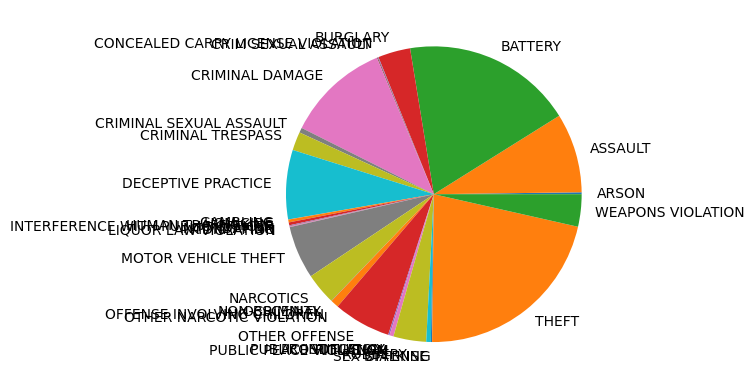

In [29]:
# pie chart for primary types 
labels = pivot["Primary Type"]
plt.pie(pivot['Arrest'], labels=labels)
plt.show

In [46]:
# pivot by year for next chart
pivot2 = pd.pivot_table(df, index = 'Year', values='Arrest' ,
                        aggfunc = 'count')
pivot2 = pd.DataFrame(pivot2).reset_index()
pivot2

,Year,Arrest
0,2019,261207
1,2020,212032
2,2021,208415
3,2022,236973
4,2023,29231


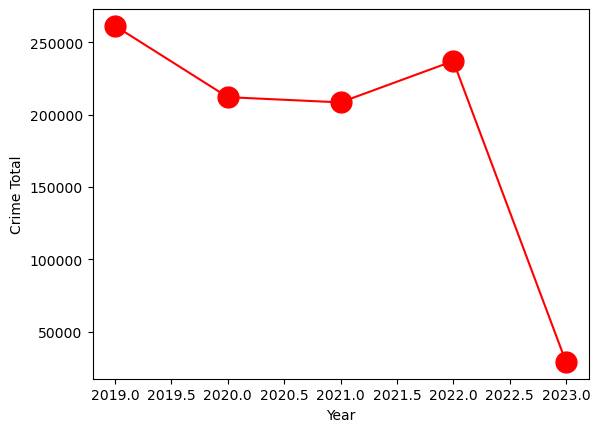

In [56]:
# line - number of crimes over time/year
plt.plot(pivot2.Year, pivot2.Arrest, color='red', marker='.', markersize=30)
plt.xlabel("Year")
plt.ylabel("Crime Total")
plt.show()
